## Preambule

In [61]:
import numpy as np
import xarray as xr
from importlib import reload
import Plotfunctions
import pandas as pd
import plotly.express as px
from plotly.colors import n_colors
from plotly.subplots import make_subplots
import os
import plotly.figure_factory as ff
import matplotlib as mpl
import plotly.io
from pathlib import Path
import matplotlib.pyplot as plt
from datetime import date
reload(Plotfunctions)
import plotly.graph_objects as go
from Plotfunctions import triangleplot, tableplot, spaghettiplot, draw_line
path = Path.cwd() / "Data"

## Parameters

In [62]:
timestamp = 2050
srt = 2 # 1=model, 2=ccat

## Prereading stuff

In [63]:
try:
    XRvar.close()
except:
    3
XRvar = xr.open_dataset(path / ("Variances.nc"))
XRvarsub = XRvar.sel(Time=timestamp)

In [64]:
remove_vars = ["Primary Energy|Other",
               "Primary Energy|Non-Biomass Renewables",
               "Secondary Energy|Electricity|Non-Biomass Renewables",
               "Primary Energy|Ocean",
               "Secondary Energy|Electricity|Ocean",
               "Secondary Energy|Electricity|Other"]
Varlist = pd.read_excel(path / "Varlist.xlsx", sheet_name = "Data")
vars = np.array(Varlist["Variable"])
cats = np.array(Varlist["Category"])
Names = np.unique(cats)
for r in remove_vars:
    wh = np.where((vars != r))[0]
    vars = vars[wh]
    cats = cats[wh]

In [65]:
XRraw = xr.open_dataset(path / ("XRdata.nc"))
XRmeta = xr.open_dataset(path / ("XRmeta.nc"))
DF = pd.read_csv(path / ("Models.csv"))
values = np.array(XRraw.Value)
modscens = np.array(XRraw.ModelScenario)
mods = np.array([i.split('|')[0] for i in modscens])
ccat = np.array(XRmeta.sel(ModelScenario=XRraw.ModelScenario).Category.data)
unimods = np.unique(mods)
uniccat = np.unique(ccat)

In [66]:
ar = np.array(XRraw.sel(Variable="Secondary Energy|Electricity", Time=2050).Value)

In [67]:
XRraw.sel(ModelScenario = np.array(XRmeta.ModelScenario)[np.array(XRmeta.Category) == "C1"], Time=2100, Variable = "Final Energy|Transportation|Electricity").mean(dim="ModelScenario")

<xarray.Dataset>
Dimensions:   ()
Coordinates:
    Variable  <U39 'Final Energy|Transportation|Electricity'
    Time      int32 2100
Data variables:
    Value     float64 43.02

In [68]:
np.nanpercentile(ar, 90)

271.72994

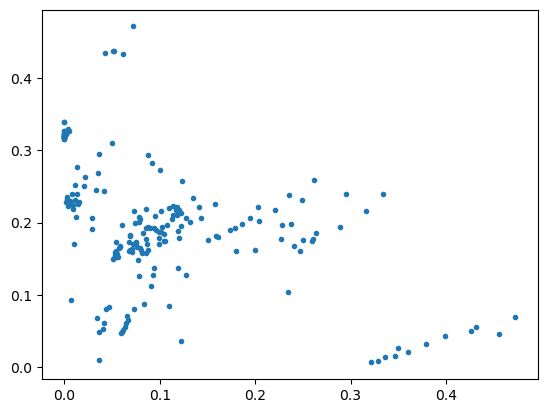

          0         1         2
0  1.000000 -0.013749  0.327373
1 -0.013749  1.000000 -0.467828
2  0.327373 -0.467828  1.000000
          0         1         2
0  1.000000 -0.320109  0.146957
1 -0.320109  1.000000 -0.517442
2  0.146957 -0.517442  1.000000


In [69]:
c = "C3"
y = 2050
bio = np.array(XRraw.sel(Variable="Final Energy|Transportation|Liquids|Bioenergy", ModelScenario = np.array(XRmeta.ModelScenario)[np.array(XRmeta.Category) == c], Time=y).Value)
h2 = np.array(XRraw.sel(Variable="Final Energy|Transportation|Hydrogen", ModelScenario = np.array(XRmeta.ModelScenario)[np.array(XRmeta.Category) == c], Time=y).Value)
ele = np.array(XRraw.sel(Variable="Final Energy|Transportation|Electricity", ModelScenario = np.array(XRmeta.ModelScenario)[np.array(XRmeta.Category) == c], Time=y).Value)
tot = np.array(XRraw.sel(Variable="Final Energy|Transportation", ModelScenario = np.array(XRmeta.ModelScenario)[np.array(XRmeta.Category) == c], Time=y).Value)
plt.plot(bio/tot, ele/tot, '.')
plt.show()
print(pd.DataFrame(np.array([h2/tot, ele/tot, bio/tot]).T).corr())
print(pd.DataFrame(np.array([h2, ele, bio]).T).corr())

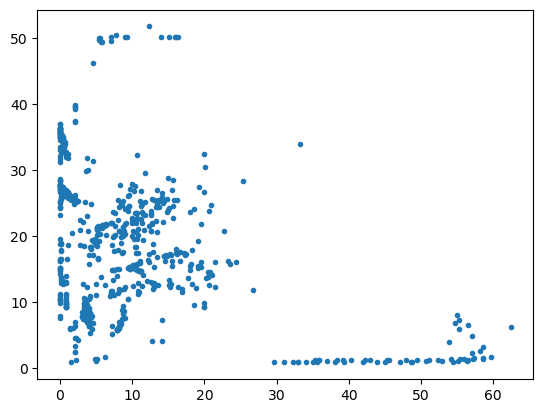

          0         1         2
0  1.000000  0.219891  0.286356
1  0.219891  1.000000 -0.222128
2  0.286356 -0.222128  1.000000
          0         1         2
0  1.000000 -0.073559  0.043807
1 -0.073559  1.000000 -0.430726
2  0.043807 -0.430726  1.000000


In [70]:
y = 2050
bio = np.array(XRraw.sel(Variable="Final Energy|Transportation|Liquids|Bioenergy", Time=y).Value)
h2 = np.array(XRraw.sel(Variable="Final Energy|Transportation|Hydrogen",  Time=y).Value)
ele = np.array(XRraw.sel(Variable="Final Energy|Transportation|Electricity", Time=y).Value)
tot = np.array(XRraw.sel(Variable="Final Energy|Transportation", Time=y).Value)
plt.plot(bio, ele, '.')
plt.show()
print(pd.DataFrame(np.array([h2/tot, ele/tot, bio/tot]).T).corr())
print(pd.DataFrame(np.array([h2, ele, bio]).T).corr())

(array([ 1.,  0.,  0.,  0.,  1., 10., 22.,  2.,  1.,  8.,  4., 13., 10.,
         8., 14.,  6.,  4., 17.,  5., 12., 15., 37., 50., 39., 27., 24.,
        35., 43., 17., 28., 24., 60., 33., 35., 29., 49., 30., 52., 26.,
        34., 28., 30., 32., 16., 23., 13., 14., 12., 15., 23., 12., 12.,
        13., 21., 16., 17., 11., 10.,  5.,  3., 11.,  8.,  2.,  2.,  3.,
         1.,  2.,  1.,  5.,  2.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 93.59774917,  96.94725729, 100.29676541, 103.64627353,
        106.99578165, 110.34528977, 113.69479789, 117.04430601,
        120.39381413, 123.74332225, 127.09283038, 130.4423385 ,
        133.79184662, 137.14135474, 140.49086286, 143.84037098,
        147.1898791 , 150.53938722, 153.88889534, 157.23840346,
        160.58791158, 163.93741971, 167.28692783, 170.63643595,
        173.98594407, 177.33545219, 180.68496031, 

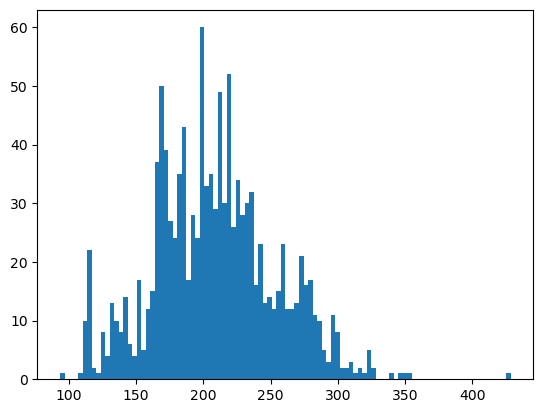

In [71]:
plt.hist(ar, bins=100)

In [72]:
XR = XRvar.sel(Variable = vars[cats == "Primary Energy"])
DF_counts = pd.read_csv("X:/user/dekkerm/Projects/AR6_Variance/variancedecomposition/Data/Counts.csv", index_col=0)
XR = XR.sel(Time=range(2030,2101))
varlist = XR.Variable.data
years = XR.Time.data
varmax = np.max(XR['Var_total']).data
cols = ['forestgreen', 'tomato', 'steelblue', 'goldenrod', 'purple', 'grey', 'brown',
        'magenta', 'red', 'darkgrey', 'blue', 'black', 'darkgreen']
years_str = np.copy(years).astype(str)
years_str[(years_str != '2050') & (years_str != '2100')] = ''

In [73]:
tot = np.array(XR.sel(Time=2050).S_c)+np.array(XR.sel(Time=2050).S_z)+np.array(XR.sel(Time=2050).S_m)
ar = np.array([np.array(XR.Variable),
(np.array(XR.sel(Time=timestamp).S_m)/tot).round(2),
(np.array(XR.sel(Time=timestamp).S_c)/tot).round(2),
(np.array(XR.sel(Time=timestamp).S_z)/tot).round(2)])

colors = n_colors('rgb(255, 200, 200)', 'rgb(200, 0, 0)', 100, colortype='rgb')
bar = px.colors.diverging.RdBu_r
colors = []
for i in range(len(bar)-1):
        colors = colors+n_colors(px.colors.diverging.RdBu_r[i], px.colors.diverging.RdBu_r[i+1], int(100/len(bar)), colortype='rgb')
colors = colors+n_colors(px.colors.diverging.RdBu_r[i+1], px.colors.diverging.RdBu_r[i+1], int(100/len(bar)), colortype='rgb')
ar100 = (ar[1:]*100).astype(int)

In [74]:
def rescale_size(s, max):
    s /= max
    s *= 1e11
    s = s ** 0.1
    return s

## Create traces

In [75]:
scatters = []
tables = []
scatterlines = []
symbols = [u'\u2600', u"\U0001F5F2"]
namecolors = [['darkgreen', 'limegreen'], ['goldenrod', 'gold']]

for n_i, name in enumerate(['Primary Energy', 'Electricity Generation']):
    varlist_abs = list(vars[cats == name])
    varlist_fr = [c+" (fr)" for c in vars[cats == name][1:]]
    varlist_all = varlist_abs+varlist_fr

    xrsub_all = XRvarsub.sel(Variable = varlist_all)
    xrsub_fr = XRvarsub.sel(Variable = varlist_fr)
    xrsub_abs = XRvarsub.sel(Variable = varlist_abs)

    # NAMING
    varlist_abs_naming = np.copy(varlist_abs)
    if name == 'Electricity Generation' or name == 'Electricity Generation (fr)':
        for v_i in range(len(varlist_abs_naming)):
            if varlist_abs_naming[v_i] == 'Secondary Energy|Electricity':
                varlist_abs_naming[v_i] = 'Total'
            elif varlist_abs_naming[v_i] == 'Secondary Energy|Electricity|Gas|w/o CCS':
                varlist_abs_naming[v_i] = 'Gas (without CCS)'
            elif varlist_abs_naming[v_i] == 'Secondary Energy|Electricity|Gas|w/ CCS':
                varlist_abs_naming[v_i] = 'Gas (with CCS)'
            elif varlist_abs_naming[v_i] == 'Secondary Energy|Electricity|Coal|w/o CCS':
                varlist_abs_naming[v_i] = 'Coal (without CCS)'
            elif varlist_abs_naming[v_i] == 'Secondary Energy|Electricity|Coal|w/ CCS':
                varlist_abs_naming[v_i] = 'Coal (with CCS)'
            elif varlist_abs_naming[v_i] == 'Secondary Energy|Electricity|Biomass|w/ CCS':
                varlist_abs_naming[v_i] = 'Biomass (with CCS)'
            elif varlist_abs_naming[v_i] == 'Secondary Energy|Electricity|Biomass|w/o CCS':
                varlist_abs_naming[v_i] = 'Biomass (without CCS)'
            else:
                varlist_abs_naming[v_i] = varlist_abs_naming[v_i][29:]
    if name == 'Primary Energy' or name == 'Primary Energy (fr)':
        for v_i in range(len(varlist_abs_naming)):
            if varlist_abs_naming[v_i] == 'Primary Energy':
                varlist_abs_naming[v_i] = 'Total'
            else:
                varlist_abs_naming[v_i] = varlist_abs_naming[v_i][15:]

    # TABLES
    table_args = []
    table_args.append(varlist_abs_naming)
    abs = (np.array(xrsub_abs.S_m)+0.5*np.array(xrsub_abs.S_mc)).round(2).astype(str)
    fr = (np.array(xrsub_fr.S_m)+0.5*np.array(xrsub_fr.S_mc)).round(2).astype(str)
    tot = []
    tot.append(abs[0])
    for v in range(len(fr)):
        tot.append(abs[1+v]+ ' / ' +fr[v])
    table_args.append(tot)
    abs = (np.array(xrsub_abs.S_c)+0.5*np.array(xrsub_abs.S_mc)).round(2).astype(str)
    fr = (np.array(xrsub_fr.S_c)+0.5*np.array(xrsub_fr.S_mc)).round(2).astype(str)
    tot = []
    tot.append(abs[0])
    for v in range(len(fr)):
        tot.append(abs[1+v]+ ' / ' +fr[v])
    table_args.append(tot)
    abs = (np.array(xrsub_abs.S_z)).round(2).astype(str)
    fr = (np.array(xrsub_fr.S_z)).round(2).astype(str)
    tot = []
    tot.append(abs[0])
    for v in range(len(fr)):
        tot.append(abs[1+v]+ ' / ' +fr[v])
    table_args.append(tot)
    table_args = np.array(table_args)
    
    ar = np.array([varlist_abs_naming,
                   (np.array(xrsub_abs.S_m)+0.5*np.array(xrsub_abs.S_mc)).round(2),
                   (np.array(xrsub_abs.S_c)+0.5*np.array(xrsub_abs.S_mc)).round(2),
                   (np.array(xrsub_abs.S_z)).round(2)])

    colors = n_colors('rgb(255, 200, 200)', 'rgb(200, 0, 0)', 100, colortype='rgb')
    bar = px.colors.diverging.RdBu_r
    colors = []
    for i in range(len(bar)-1):
        colors = colors+n_colors(px.colors.diverging.RdBu_r[i], px.colors.diverging.RdBu_r[i+1], int(100/len(bar)), colortype='rgb')
    colors = colors+n_colors(px.colors.diverging.RdBu_r[i+1], px.colors.diverging.RdBu_r[i+1], int(100/len(bar)), colortype='rgb')
    ar100 = 10+(ar[1:].astype(float)*70).astype(int)+10
    head = name
    if name == 'Electricity Generation':
        head = "Electricity"
    tables.append(go.Table(columnwidth = [2, 1, 1, 1],
                        header = dict(values = [['<b>'+head+' '+symbols[n_i]+'</b>'],
                                      ["<b>Model</b>"],
                                      ['<b>Climate</b>'],
                                      ['<b>Other</b>']],
                                      line_color='white',
                                      fill_color=[namecolors[n_i][0], 'white', 'white', 'white'],
                                      align=['center','center','center','center'],
                                      font=dict(color='black', size=12),
                                      height=22
                                     ),
                        cells=dict(values=table_args[:, ar[srt].astype(float).argsort()[::-1]],
                                   line={'color': 'black', 'width': 0},
                                   align=['center','center','center','center'],
                                   fill_color=['white', 
                                               np.array(colors)[ar100[:, ar[srt].astype(float).argsort()[::-1]][0]],
                                               np.array(colors)[ar100[:, ar[srt].astype(float).argsort()[::-1]][1]],
                                               np.array(colors)[ar100[:, ar[srt].astype(float).argsort()[::-1]][2]]],
                                   font={#'family' : ["Arial", "Arial Black", "Arial Black", "Arial Black"],
                                         'color': 'black',
                                         'size': 11},
                                   height=22
                                  )
                       ))
    
    # SCATTERS
    for v in range(len(varlist_abs)-1):
        coords = []
        for f_i in range(2):
            if f_i == 0: # abs
                ds = xrsub_abs.sel(Variable=varlist_abs[v+1])
                var = varlist_abs_naming[v+1]
            elif f_i == 1: # fr
                ds = xrsub_fr.sel(Variable=varlist_fr[v])
                var = varlist_abs_naming[v+1]+" (fr)"
            a, b, c, d, s = np.array(ds[['S_c', 'S_m', 'S_z', 'S_mc', 'Var_total']].to_array())
            s = 20# 2*rescale_size(float(s/XRraw.sel(Time=timestamp, Variable=varlist[v]).Value.mean(axis=0)), varmax)
            lw = 1 # s/10
            maxsize = 30
            coords.append([a+0.5*d, b+0.5*d, c])
            scatters.append(go.Scatterternary(a=[a+0.5*d], b=[b+0.5*d], c=[c],
                                            mode='markers', name=var, showlegend=False, text=[timestamp],
                                            hovertemplate='%{text}<br>Var (climate): %{a}<br>Var (model): %{b} <br>Var (other): %{c}',
                                            marker={'size': 0.1, 'symbol': "circle", 'color': namecolors[n_i][f_i], 'opacity': 1, 'line' :dict(width=lw, color='black')},
                                            line={'width': 1.5},
                                            textfont=dict(size=1, color=namecolors[n_i])))
            if name == 'Electricity Generation':
                scatters.append(go.Scatterternary(a=[a+0.5*d], b=[b+0.5*d], c=[c],
                                mode='text', textfont={'size': maxsize, 'color': namecolors[n_i][f_i]},
                                text=[u"\U0001F5F2"], showlegend=False))
            if name == 'Primary Energy':
                scatters.append(go.Scatterternary(a=[a+0.5*d], b=[b+0.5*d], c=[c],
                                mode='text', textfont={'size': maxsize, 'color': namecolors[n_i][f_i]},
                                text=[u"\u2600"], showlegend=False))
    
        # LINES BETWEEN SCATTERS
        coords = np.array(coords)
        scatters.append(go.Scatterternary(a=coords[:, 0], b=coords[:, 1], c=coords[:, 2],
                        mode='lines', hoverinfo="skip", line={'width': 1, "color": namecolors[n_i][0], "dash": "dot"},
                        text="", showlegend=False))
        


In [76]:
# scatters = []
# tables = []
# namecolors = [['darkgreen', 'limegreen'], ['goldenrod', 'gold']]
# symbols = [u'\u2600', u"\U0001F5F2"]
# namesymbols = ['circle', 'diamond-wide', 'star', 'square', 'cross', 'star-triangle-up', 'diamond-tall']

# for n_i, name in enumerate(['Primary Energy', 'Electricity Generation']):

#     xrsub = XRvarsub.sel(Variable = list(vars[cats == name]) + [c+" (fr)" for c in vars[cats == name][1:]])

#     # Table
#     tot = 1#np.array(xrsub.S_c)+np.array(xrsub.S_z)+np.array(xrsub.S_m)
#     var = vars[cats == name]# = np.array(xrsub.Variable)
#     if name == 'Electricity Generation' or name == 'Electricity Generation (fr)':
#         for v_i in range(len(var)):
#             if var[v_i] == 'Secondary Energy|Electricity':
#                 var[v_i] = 'Total'
#             elif var[v_i] == 'Secondary Energy|Electricity|Gas|w/o CCS':
#                 var[v_i] = 'Gas (without CCS)'
#             elif var[v_i] == 'Secondary Energy|Electricity|Gas|w/ CCS':
#                 var[v_i] = 'Gas (with CCS)'
#             elif var[v_i] == 'Secondary Energy|Electricity|Coal|w/o CCS':
#                 var[v_i] = 'Coal (without CCS)'
#             elif var[v_i] == 'Secondary Energy|Electricity|Coal|w/ CCS':
#                 var[v_i] = 'Coal (with CCS)'
#             elif var[v_i] == 'Secondary Energy|Electricity|Biomass|w/ CCS':
#                 var[v_i] = 'Biomass (with CCS)'
#             elif var[v_i] == 'Secondary Energy|Electricity|Biomass|w/o CCS':
#                 var[v_i] = 'Biomass (without CCS)'
#             else:
#                 var[v_i] = var[v_i][29:]
#     if name == 'Primary Energy' or name == 'Primary Energy (fr)':
#         for v_i in range(len(var)):
#             if var[v_i] == 'Primary Energy':
#                 var[v_i] = 'Total'
#             else:
#                 var[v_i] = var[v_i][15:]
#     ar = np.array([var,
#                    (np.array(xrsub.S_m)+0.5*np.array(xrsub.S_mc)/tot).round(2),
#                    (np.array(xrsub.S_c)+0.5*np.array(xrsub.S_mc)/tot).round(2),
#                    (np.array(xrsub.S_z)/tot).round(2)])
#     colors = n_colors('rgb(255, 200, 200)', 'rgb(200, 0, 0)', 100, colortype='rgb')
#     bar = px.colors.diverging.RdBu_r
#     colors = []
#     for i in range(len(bar)-1):
#         colors = colors+n_colors(px.colors.diverging.RdBu_r[i], px.colors.diverging.RdBu_r[i+1], int(100/len(bar)), colortype='rgb')
#     colors = colors+n_colors(px.colors.diverging.RdBu_r[i+1], px.colors.diverging.RdBu_r[i+1], int(100/len(bar)), colortype='rgb')
#     ar100 = 10+(ar[1:]*70).astype(int)
#     head = name
#     if name == 'Electricity Generation':
#         head = "Electricity"
#     tables.append(go.Table(columnwidth = [4, 1, 1, 1],
#                         header = dict(values = [['<b>'+head+' '+symbols[n_i]+'</b>'],
#                                       ["<b>Model</b>"],
#                                       ['<b>Climate</b>'],
#                                       ['<b>Other</b>']],
#                                       line_color='white',
#                                       fill_color=[namecolors[n_i], 'white', 'white', 'white'],
#                                       align=['center','center','center','center'],
#                                       font=dict(color='black', size=12),
#                                       height=22
#                                      ),
#                         cells=dict(values=ar[:, ar[srt].argsort()[::-1]],
#                                    line={'color': 'black', 'width': 0},
#                                    align=['center','center','center','center'],
#                                    fill_color=['white', 
#                                                np.array(colors)[ar100[:, ar[srt].argsort()[::-1]][0]],
#                                                np.array(colors)[ar100[:, ar[srt].argsort()[::-1]][1]],
#                                                np.array(colors)[ar100[:, ar[srt].argsort()[::-1]][2]]],
#                                    font={#'family' : ["Arial", "Arial Black", "Arial Black", "Arial Black"],
#                                          'color': 'black',
#                                          'size': 11},
#                                    height=22
#                                   )
#                        ))

#     # Scatter
#     varlist = np.array(vars[cats == name])
#     for v in range(len(varlist)):
#             coords = []
#             ds = xrsub.sel(Variable=varlist[v])
#             a, b, c, d, s = np.array(ds[['S_c', 'S_m', 'S_z', 'S_mc', 'Var_total']].to_array())
#             s = 20# 2*rescale_size(float(s/XRraw.sel(Time=timestamp, Variable=varlist[v]).Value.mean(axis=0)), varmax)
#             lw = 1 # s/10

#             maxsize2 = 42
#             if varlist[v] in ['Primary Energy|Coal',
#                               'Secondary Energy|Electricity|Coal']:
#                 da = 0
#                 if varlist[v] == "Emissions|Kyoto Gases": da = 0.06
#                 lw = 0
#                 scatters.append(go.Scatterternary(a=[a+0.5*d+da], b=[b+0.5*d], c=[c],
#                                                 hoverinfo='skip',
#                                                 mode='markers', marker={'size': maxsize2-6, 'symbol': 'circle-open', 'color': namecolors[n_i]},
#                                                 marker_line_width = 3,
#                                                 showlegend=False))
#                 scatters.append(go.Scatterternary(a=[a+0.5*d+da], b=[b+0.5*d], c=[c],
#                                                 hoverinfo='skip',
#                                                 mode='markers', marker={'size': maxsize2, 'symbol': 'circle-open', 'color': 'black'},
#                                                 marker_line_width = 3,
#                                                 showlegend=False))
#             scatters.append(go.Scatterternary(a=[a+0.5*d], b=[b+0.5*d], c=[c],
#                                             mode='markers', name=varlist[v], showlegend=False, text=[timestamp],
#                                             hovertemplate='%{text}<br>Var (climate): %{a}<br>Var (model): %{b} <br>Var (other): %{c}',
#                                             marker={'size': 0.1, 'symbol': namesymbols[n_i], 'color': namecolors[n_i], 'opacity': 1, 'line' :dict(width=lw, color='black')},
#                                             line={'width': 1.5},
#                                             textfont=dict(size=1, color=namecolors[n_i])))
#             maxsize = 30
#             if name == 'Electricity Generation':
#                 scatters.append(go.Scatterternary(a=[a+0.5*d], b=[b+0.5*d], c=[c],
#                                 mode='text', textfont={'size': maxsize, 'color': namecolors[n_i]},
#                                 text=[u"\U0001F5F2"], showlegend=False))
#             if name == 'Primary Energy':
#                 scatters.append(go.Scatterternary(a=[a+0.5*d], b=[b+0.5*d], c=[c],
#                                 mode='text', textfont={'size': maxsize, 'color': namecolors[n_i]},
#                                 text=[u"\u2600"], showlegend=False))
# #['Emissions', 'Primary Energy', 'Electricity Generation', 'Sector Industry', 'Sector Transportation', 'Sector Residential']


Ternary plot

In [77]:
trace_ternary_lines = []
for i in range(10):
        a = [0+i*0.1, 0+i*0.1]
        b = [0, 1-a[0]]
        c = [1-a[0], 0]
        rgb = mpl.colors.colorConverter.to_rgb(plt.cm.get_cmap('Greys')(0.+i/20))
        col = 'rgb('+str(rgb[0])+','+str(rgb[1])+','+str(rgb[2])+')'
        trace_ternary_lines.append(go.Scatterternary(a=a, b=b, c=c, showlegend=False, mode='lines', hoverinfo='skip', line={'width': 0.25+i*0.1, 'color': col}))
        trace_ternary_lines.append(go.Scatterternary(a=b, b=a, c=c, showlegend=False, mode='lines', hoverinfo='skip', line={'width': 0.25+i*0.1, 'color': col}))
        trace_ternary_lines.append(go.Scatterternary(a=b, b=c, c=a, showlegend=False, mode='lines', hoverinfo='skip', line={'width': 0.25+i*0.1, 'color': col}))

trace_ternary_border = []
#trace_ternary_border.append(go.Scatterternary(a=[0.005, 0.005], b=[0, 0.25], c=[0.25, 0], showlegend=False, mode='lines', hoverinfo='skip', line={'width': 2, 'color': 'black'}))
#trace_ternary_border.append(go.Scatterternary(a=[0, 0.5], b=[0.005, 0.005], c=[0.5, 0], showlegend=False, mode='lines', hoverinfo='skip', line={'width': 2, 'color': 'black'}))
#trace_ternary_border.append(go.Scatterternary(a=[0, 1], b=[1, 0], c=[0.005, 0.005], showlegend=False, mode='lines', hoverinfo='skip', line={'width': 2, 'color': 'black'}))

C:\Users\dekkerm\AppData\Local\Temp\2\ipykernel_10300\4024270652.py:6: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



Contours

In [78]:
def clean_data(data_in):
    """
    Cleans data in a format which can be conveniently
    used for drawing traces. Takes a dictionary as the
    input, and returns a list in the following format:

    input = {'key': ['a b c']}
    output = [key, [a, b, c]]
    """
    key = list(data_in.keys())[0]
    data_out = [key]
    for i in data_in[key]:
        data_out.append(list(map(float, i.split(' '))))

    return data_out

Contour version 2

In [79]:
conts = []
for i in np.arange(35, 51, 5):
    conts.append({str(i): [str(i) +' '+str(i)+' '+str(100-2*i),
                  str(i) +' '+str(100-2*i)+' '+str(i),
                  str(100-2*i) +' '+str(i)+' '+str(i)]})
for i in np.arange(55, 101, 5):
    i0 = str(i)
    i1 = str(100-i)
    conts.append({str(i): [i0+' '+i1+' 0',
                            i0+' 0 '+i1,
                            i1+' 0 '+i0,
                            '0 '+i1+' '+i0,
                            '0 '+i0+' '+i1,
                            i1+' '+i0+' 0',
                            i0+' '+i1+' 0']})

In [80]:
conts2 = []
for i in np.arange(35, 51, 5):
    conts2.append({str(i): [str(i) +' '+str(i)+' '+str(100-2*i),
                  str(i) +' '+str(100-2*i)+' '+str(i),
                  str(100-2*i) +' '+str(i)+' '+str(i)]})
for x in np.arange(55, 101, 5):
    conts2.append({str(i): [str(x)+' '+'0'+' '+str(100-x),
                               str(x-5)+' '+'0'+' '+str(100-(x-5)),
                               str(x-5)+' '+str(100-(x-5))+' '+'0',
                               str(x)+' '+str(100-x)+' '+'0',
                               str(x)+' '+'0'+' '+str(100-x)
                                ]})
    conts2.append({str(i): ['0'+' '+str(100-x)+' '+str(x),
                               '0'+' '+str(100-(x-5))+' '+str(x-5),
                               str(100-(x-5))+' '+'0'+' '+str(x-5),
                               str(100-x)+' '+'0'+' '+str(x),
                               '0'+' '+str(100-x)+' '+str(x)
                                ]})
    conts2.append({str(i): [str(100-x)+' '+str(x)+' '+'0',
                               str(100-(x-5))+' '+str(x-5)+' '+'0',
                               '0'+' '+str(x-5)+' '+str(100-(x-5)),
                               '0'+' '+str(x)+' '+str(100-x),
                               str(100-x)+' '+str(x)+' '+'0'
                                ]})

Blue contours

In [81]:
blueconts = []
for x in np.arange(55, 101, 5):
    blueconts.append({str(i): [str(x)+' '+'0'+' '+str(100-x),
                               str(x-5)+' '+'0'+' '+str(100-(x-5)),
                               str(x-5)+' '+str((100-(x-5))/2)+' '+str((100-(x-5))/2),
                               str(x)+' '+str((100-x)/2)+' '+str((100-x)/2),
                               str(x)+' '+'0'+' '+str(100-x)
                                ]})

In [82]:
bar = px.colors.diverging.RdBu_r
bar = bar[2:-2]
bar = bar[int(len(bar)/2)-2:]
colors = []
for i in range(len(bar)-1):
    colors = colors+n_colors(bar[i], bar[i+1], int(200/len(bar)), colortype='rgb')
colors = colors+n_colors(bar[i+1], bar[i+1], int(200/len(bar)), colortype='rgb')

In [83]:
conttraces = []
n = 0
for raw_data in conts2:
    data = clean_data(raw_data)

    a = [inner_data[0] for inner_data in data[1:]]
    a.append(data[1][0]) # Closing the loop

    b = [inner_data[1] for inner_data in data[1:]]
    b.append(data[1][1]) # Closing the loop

    c = [inner_data[2] for inner_data in data[1:]]
    c.append(data[1][2]) # Closing the loop

    conttraces.append(go.Scatterternary(
        text = data[0],
        a=a, b=b, c=c, mode='lines',
        line=dict(color='black', width=0),
        fill='toself',showlegend=False, hoverinfo='skip', opacity=0.3, 
        fillcolor = colors[int(200/len(conts2)*n)]#colors_iterator.__next__()
    ))
    n+=1
conttraces = conttraces[::-1]

In [84]:
bar = px.colors.sequential.Greys # px.colors.diverging.RdBu_r
#bar = bar[2:-2]
#bar = bar[int(len(bar)/2)-2:]
colors = []
for i in range(len(bar)-1):
    colors = colors+n_colors(bar[i], bar[i+1], int(200/len(bar)), colortype='rgb')
colors = colors+n_colors(bar[i+1], bar[i+1], int(200/len(bar)), colortype='rgb')

In [85]:
conttraces = []
n = 0
for raw_data in conts2:
    data = clean_data(raw_data)

    a = [inner_data[0] for inner_data in data[1:]]
    a.append(data[1][0]) # Closing the loop

    b = [inner_data[1] for inner_data in data[1:]]
    b.append(data[1][1]) # Closing the loop

    c = [inner_data[2] for inner_data in data[1:]]
    c.append(data[1][2]) # Closing the loop

    conttraces.append(go.Scatterternary(
        text = data[0],
        a=a, b=b, c=c, mode='lines',
        line=dict(color='black', width=0),
        fill='toself',showlegend=False, hoverinfo='skip', opacity=0.2, 
        fillcolor = colors[int(200/len(conts2)*n)]#colors_iterator.__next__()
    ))
    n+=1
conttraces = conttraces[::-1]

## Add together

In [86]:
def draw_line(fig, name, x, y, xt, yt, color):
    fig.add_shape(type="line", xref='paper', yref='paper',
                  x0=x,
                  y0=x+xt,
                  x1=x,
                  y1=y+yt,
                  line=dict(color=color, width=3))
    fig.add_annotation(xref='paper',
                       yref='paper',
                       #xref = 'x4',
                       #yref = 'y4',
                       x=x,
                       ax=xt,
                       align="center",
                       y=y,
                       ay=yt,
                       text=name,
                       #textangle=90,
                       font=dict(color=color,
                                 family='Arial Black',
                                 size=12),
                       showarrow=True)

In [87]:
def draw_ann(fig, name, x, y, color, vert, hor):
    align = 'left'
    h = 1
    if hor == 'left':
        align = 'right'
        h = -1
    v = 1
    if vert == 'down':
        v = -1
    dy = 0
    if y>0.5:
        dy = 0.02
    dx = 0
    if y> 0.9:
        dx = -0.02
    fig.add_shape(type="line", xref='paper', yref='paper',
                  x0=x,
                  y0=y,
                  x1=x+0.02*h,
                  y1=y+0.02*v,
                  line=dict(color='black', width=3))
    fig.add_shape(type="line", xref='paper', yref='paper',
                  x0=x+[0, 0.15, -0.11][h],
                  y0=y+0.02*v,
                  x1=x+0.02*h,
                  y1=y+0.02*v,
                  line=dict(color='black', width=3))
    fig.add_annotation(xref='paper',
                       yref='paper',
                       #xref = 'x4',
                       #yref = 'y4',
                       x=x+0.2*h+dx,
                       ax=0,
                       align=align,
                       y=y+0.02*v+dy,
                       ay=-0,
                       text=name,
                       #textangle=90,
                       font=dict(color=color,
                                 family='Arial Black',
                                 size=12),
                       showarrow=False)

In [88]:
# -*- coding: utf-8 -*-
fig = make_subplots(
    rows=6, cols=5,
    horizontal_spacing = 0.04,
    vertical_spacing=0,
    # column_widths = [0.15, 0.7, 0.15],
    # row_heights = [0.15, 0.7, 0.15],
    # specs = [[{"type": "table", "rowspan": 2}, {"type": "scatterternary", "colspan": 2, "rowspan": 6}, {}, {"type": "table", "rowspan": 2}],
    #          [{}, {}, {}, {}],
    #          [{"type": "table", "rowspan": 2}, {}, {}, {"type": "table", "rowspan": 2}],
    #          [{}, {}, {}, {}],
    #          [{"type": "table", "rowspan": 2}, {}, {}, {"type": "table", "rowspan": 2}],
    #          [{}, {}, {}, {}]
    #         ]
    specs = [[{"type": "scatterternary", "colspan": 3, "rowspan": 6}, {}, {}, {}, {}],
             [{}, {}, {}, {"type": "table", "rowspan": 2, "colspan": 2}, {}],
             [{}, {}, {}, {}, {}],
             [{}, {}, {}, {"type": "table", "rowspan": 2, "colspan": 2}, {}],
             [{}, {}, {}, {}, {}],
             [{}, {}, {}, {}, {}]
            ]
)

# Lines 50%
fig.add_trace(go.Scatterternary(a=[0.5, 0.5, 0, 0.5], b=[0, 0.5, 0.5, 0], c=[0.5, 0, 0.5, 0.5],
                                                mode='lines',
                                                showlegend=False,
                                                hoverinfo='skip',
                                                marker={'size': 15,
                                                        'color': 'black',
                                                        'opacity': 1,#0.9-i*0.03,
                                                        'line' :dict(width=0., color="rgba(89,168,89,1)")},
                                                line={'width': 1, #np.mean(s[i:i+2])*0.5,
                                                        'color': 'black'},
                                                textfont=dict(size=5,
                                                        color='black')), 1, 1)
                                                        
fig.add_trace(tables[0], 2, 4)
fig.add_trace(tables[1], 4, 4)
#fig.add_trace(tables[5], 5, 3)

#fig.add_trace(tables[3], 1, 3)
#fig.add_trace(tables[4], 3, 3)
#fig.add_trace(tables[2], 7, 3)


#fig.add_traces(fig1.data, 1, 1)
for n in range(len(conttraces)):
        fig.add_trace(conttraces[n], 1, 1)
# for n in range(len(conttracesb)):
#         fig.add_trace(conttracesb[n], 1, 1)
# for n in range(len(trace_ternary_lines)):
#     fig.add_trace(trace_ternary_lines[n], 1, 1)
# for n in range(len(trace_ternary_border)):
#     fig.add_trace(trace_ternary_border[n], 1, 1)
for n in range(len(scatters)):
    fig.add_trace(scatters[n], 1, 1)
fig.update_layout(height=750, width=1300)
fig.update_layout({'margin':dict(l=50,r=0,b=0,t=0),
'ternary':
{'sum':1,
'bgcolor':'rgba(0,0,0,0)',#'whitesmoke',
    # "paper_bgcolor":'rgba(0,0,0,0)',
    # "plot_bgcolor":'rgba(0,0,0,0)',
'aaxis':{'title': 'Climate target<br>', 'min': 0, 
        'linewidth':0, 'ticks':'outside',
        'tickmode':'array','tickvals':[0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'ticktext':['50%', '60%', '70%', '80%', '90%', '100%'], 'tickfont':{'size':12}},
'baxis':{'title': 'Model &nbsp; &nbsp;', 'min': 0, 
        'linewidth':2, 'ticks':'outside',
        'tickmode':'array','tickvals':[0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'ticktext':['50%', '60%', '70%', '80%', '90%', '100%'],'tickangle':60, 'tickfont':{'size':12}},
'caxis':{'title': 'Other scenario<br>assumptions', 'min': 0, 
        'linewidth':2, 'ticks':'outside',
        'tickmode':'array','tickvals':[0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'ticktext':['50%', '60%', '70%', '80%', '90%', '100%'],'tickangle':-60, 'tickfont':{'size':12}}}})

# fig.add_trace(go.Scatterternary(a=[a], b=[b], c=[c],
# mode='text', textfont={'size': 35},
# #text=[u'&#128663;'.encode("utf-8")]))
# text=[u'\u9935'.encode("utf-8")]))
#draw_line(fig, "Primary energy coal", 0.5, 0.725, 150, -40, "forestgreen")
# draw_line(fig, "Primary energy oil", 0.49, 0.62, 210, -40, "violet")
# draw_line(fig, "Kyoto gas emissions", 0.51, 0.905, 120, -30, "goldenrod")
# draw_line(fig, "Coal (w/o CCS) in<br>electricity production", 0.52, 0.765, 150, -60, "forestgreen")
# draw_line(fig, "Electricity usage<br>in industry", 0.385, 0.235, -120, -120, "silver")
# draw_line(fig, "Electricity usage<br>in transport", 0.395, 0.205, 200, -40, "teal")
#draw_line(fig, "Electricity usage<br>in residential", 0.38, 0.145, 180, 40, "silver")
# draw_ann(fig, "Electricity in<br>residential sector", 0.20, 0.486, "darkgray", "down", "right")
# draw_ann(fig, "Electricity in<br>transport sector", 0.22, 0.556, "teal", "up", "right")
# draw_ann(fig, "Electricity in<br>industry sector", 0.20, 0.592, "peru", "up", "left")
# draw_ann(fig, "Primary Energy<br>from coal", 0.30, 0.85, "forestgreen", "up", "left")
# draw_ann(fig, "Primary Energy<br>from oil", 0.29, 0.743, "forestgreen", "down", "left")
# draw_ann(fig, "Kyoto gas<br>emissions", 0.345, 0.945, "violet", "down", "right")
# draw_ann(fig, "Electricity from<br>coal (w/o CCS)", 0.335, 0.832, "goldenrod", "down", "right")
fig.show()

## Savings

In [89]:
try:
    os.remove('Figures/Paperfigures/Figure_si_fraction_e.html')
except:
    3
def html_w(typ):
    return '<html> '+typ+' <p style="font-family: Arial">'

# fig.write_image("Figures/Paperfigures/Figure_si_fraction_e.pdf")
# fig.write_image("Figures/Paperfigures/Figure_3_f.png", scale=3)
fig.write_image("Figures/Paperfigures/Figure_si_fraction_e.svg")
today = date.today()
td = today.strftime("%B %d, %Y")

with open('Figures/Paperfigures/Figure_si_fraction_e.html', 'a') as f:
    f.write(html_w('<h1>')+'Figure 3 - Overview</p></h1>')
    f.write(html_w('<body>')+'Data is for year '+str(timestamp)+'. Version: '+td+'</p></body>')
    f.write(fig.to_html(full_html=False, include_plotlyjs='cdn'))